# Importing all the **libraries**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from flask import Flask, render_template, request
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from scipy.stats import zscore
# from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn import metrics

In [ ]:
def posix_time(dt):
    return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)



#importing the dataset




In [ ]:
# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Data

import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/FDM Mini project new/traffic_volume_data.csv")
data


,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,last_2_hour_traffic,last_3_hour_traffic,last_4_hour_traffic,last_5_hour_traffic,last_6_hour_traffic,hour,month_day,weekday,month,year
0,2012-10-02 15:00:00,0,184,64,3,328,7,7,293.17,0.0,...,4918.0,5026.0,4767.0,4516.0,5545.0,15,2,2,10,2012
1,2012-10-02 16:00:00,0,167,64,3,327,7,7,293.86,0.0,...,5181.0,4918.0,5026.0,4767.0,4516.0,16,2,2,10,2012
2,2012-10-02 17:00:00,0,119,63,3,327,6,6,294.14,0.0,...,5584.0,5181.0,4918.0,5026.0,4767.0,17,2,2,10,2012
3,2012-10-02 18:00:00,0,161,63,3,326,3,3,293.10,0.0,...,6015.0,5584.0,5181.0,4918.0,5026.0,18,2,2,10,2012
4,2012-10-02 19:00:00,0,243,62,3,326,8,8,290.97,0.0,...,5791.0,6015.0,5584.0,5181.0,4918.0,19,2,2,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33739,2017-05-17 21:00:00,0,74,85,1,328,7,7,287.88,0.0,...,2348.0,2733.0,2733.0,2733.0,3136.0,21,17,3,5,2017
33740,2017-05-17 22:00:00,0,81,70,1,24,2,2,286.95,0.0,...,2348.0,2348.0,2733.0,2733.0,2733.0,22,17,3,5,2017
33741,2017-05-17 22:00:00,0,138,70,1,24,1,1,286.95,0.0,...,2348.0,2348.0,2348.0,2733.0,2733.0,22,17,3,5,2017
33742,2017-05-17 23:00:00,0,229,66,1,42,6,6,285.75,0.0,...,2194.0,2348.0,2348.0,2348.0,2733.0,23,17,3,5,2017


# **Drop Columns**

In [ ]:
#  Function to drop columns with null values more than a given precentage

def drop_clmn(df, percentage):

  columns = df.columns
  percent_miss = df.isnull().sum() * 100 / len(df)
  miss_value = pd.DataFrame({'clmn_name': columns,
                             'percent_missing': percent_miss})

  drop_column = list(miss_value[miss_value.percent_missing > percentage].clmn_name)
  df = df.drop(drop_column, axis=1)
  return df

In [ ]:
# drop columns with null values more than 50%

data = drop_clmn(data,50)
data

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,last_2_hour_traffic,last_3_hour_traffic,last_4_hour_traffic,last_5_hour_traffic,last_6_hour_traffic,hour,month_day,weekday,month,year
0,2012-10-02 15:00:00,0,184,64,3,328,7,7,293.17,0.0,...,4918.0,5026.0,4767.0,4516.0,5545.0,15,2,2,10,2012
1,2012-10-02 16:00:00,0,167,64,3,327,7,7,293.86,0.0,...,5181.0,4918.0,5026.0,4767.0,4516.0,16,2,2,10,2012
2,2012-10-02 17:00:00,0,119,63,3,327,6,6,294.14,0.0,...,5584.0,5181.0,4918.0,5026.0,4767.0,17,2,2,10,2012
3,2012-10-02 18:00:00,0,161,63,3,326,3,3,293.10,0.0,...,6015.0,5584.0,5181.0,4918.0,5026.0,18,2,2,10,2012
4,2012-10-02 19:00:00,0,243,62,3,326,8,8,290.97,0.0,...,5791.0,6015.0,5584.0,5181.0,4918.0,19,2,2,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33739,2017-05-17 21:00:00,0,74,85,1,328,7,7,287.88,0.0,...,2348.0,2733.0,2733.0,2733.0,3136.0,21,17,3,5,2017
33740,2017-05-17 22:00:00,0,81,70,1,24,2,2,286.95,0.0,...,2348.0,2348.0,2733.0,2733.0,2733.0,22,17,3,5,2017
33741,2017-05-17 22:00:00,0,138,70,1,24,1,1,286.95,0.0,...,2348.0,2348.0,2348.0,2733.0,2733.0,22,17,3,5,2017
33742,2017-05-17 23:00:00,0,229,66,1,42,6,6,285.75,0.0,...,2194.0,2348.0,2348.0,2348.0,2733.0,23,17,3,5,2017


# **Drop Rows**

In [ ]:
# get the count of null value as percentage of dataset
data.isnull().sum()/data.count()*100

date_time              0.0
is_holiday             0.0
air_pollution_index    0.0
humidity               0.0
wind_speed             0.0
wind_direction         0.0
visibility_in_miles    0.0
dew_point              0.0
temperature            0.0
rain_p_h               0.0
snow_p_h               0.0
clouds_all             0.0
weather_type           0.0
weather_description    0.0
traffic_volume         0.0
last_1_hour_traffic    0.0
last_2_hour_traffic    0.0
last_3_hour_traffic    0.0
last_4_hour_traffic    0.0
last_5_hour_traffic    0.0
last_6_hour_traffic    0.0
hour                   0.0
month_day              0.0
weekday                0.0
month                  0.0
year                   0.0
dtype: float64

In [ ]:
# Drop missing value rows

data.dropna(inplace=True)
print(data)

                 date_time  is_holiday  air_pollution_index  humidity  \
0      2012-10-02 15:00:00           0                  184        64   
1      2012-10-02 16:00:00           0                  167        64   
2      2012-10-02 17:00:00           0                  119        63   
3      2012-10-02 18:00:00           0                  161        63   
4      2012-10-02 19:00:00           0                  243        62   
...                    ...         ...                  ...       ...   
33739  2017-05-17 21:00:00           0                   74        85   
33740  2017-05-17 22:00:00           0                   81        70   
33741  2017-05-17 22:00:00           0                  138        70   
33742  2017-05-17 23:00:00           0                  229        66   
33743  2017-05-17 23:00:00           0                  140        63   

       wind_speed  wind_direction  visibility_in_miles  dew_point  \
0               3             328                    7

# **Remove Duplicates**

In [ ]:
# number of duplicate raws value
data.duplicated().sum()

0

In [ ]:
# Drop the duplicates
data.drop_duplicates()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,last_2_hour_traffic,last_3_hour_traffic,last_4_hour_traffic,last_5_hour_traffic,last_6_hour_traffic,hour,month_day,weekday,month,year
0,2012-10-02 15:00:00,0,184,64,3,328,7,7,293.17,0.0,...,4918.0,5026.0,4767.0,4516.0,5545.0,15,2,2,10,2012
1,2012-10-02 16:00:00,0,167,64,3,327,7,7,293.86,0.0,...,5181.0,4918.0,5026.0,4767.0,4516.0,16,2,2,10,2012
2,2012-10-02 17:00:00,0,119,63,3,327,6,6,294.14,0.0,...,5584.0,5181.0,4918.0,5026.0,4767.0,17,2,2,10,2012
3,2012-10-02 18:00:00,0,161,63,3,326,3,3,293.10,0.0,...,6015.0,5584.0,5181.0,4918.0,5026.0,18,2,2,10,2012
4,2012-10-02 19:00:00,0,243,62,3,326,8,8,290.97,0.0,...,5791.0,6015.0,5584.0,5181.0,4918.0,19,2,2,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33739,2017-05-17 21:00:00,0,74,85,1,328,7,7,287.88,0.0,...,2348.0,2733.0,2733.0,2733.0,3136.0,21,17,3,5,2017
33740,2017-05-17 22:00:00,0,81,70,1,24,2,2,286.95,0.0,...,2348.0,2348.0,2733.0,2733.0,2733.0,22,17,3,5,2017
33741,2017-05-17 22:00:00,0,138,70,1,24,1,1,286.95,0.0,...,2348.0,2348.0,2348.0,2733.0,2733.0,22,17,3,5,2017
33742,2017-05-17 23:00:00,0,229,66,1,42,6,6,285.75,0.0,...,2194.0,2348.0,2348.0,2348.0,2733.0,23,17,3,5,2017


# **Analyze Data**

<Axes: >

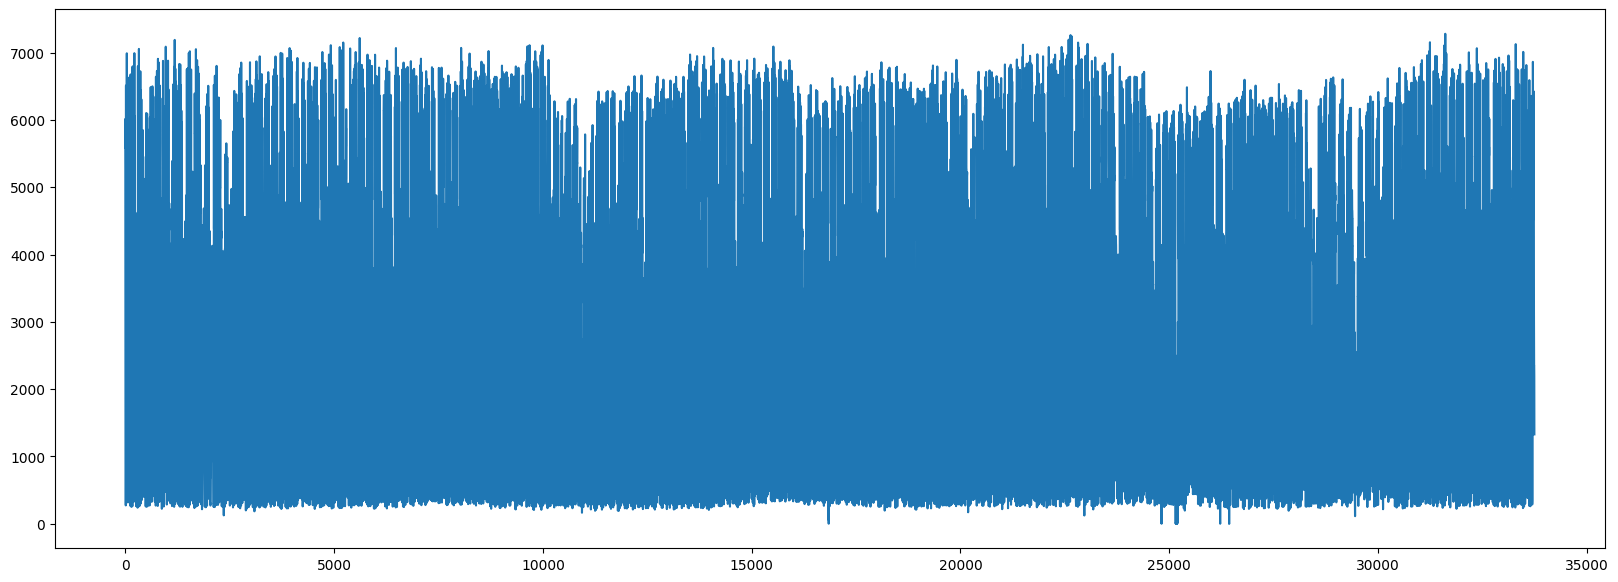

In [ ]:
plt.figure(figsize=(20,7))
data['traffic_volume'].plot()

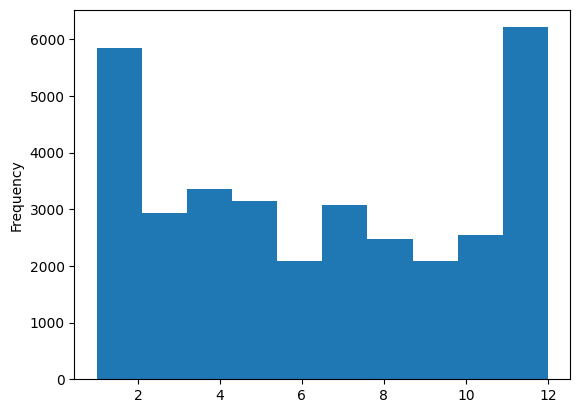

In [ ]:
data["month"].plot(kind = 'hist')
plt.show()

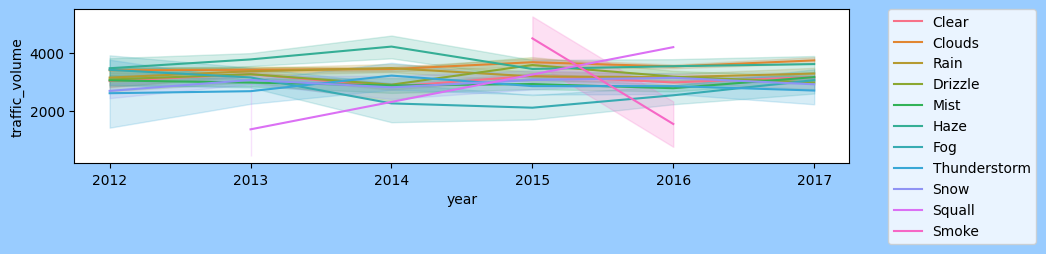

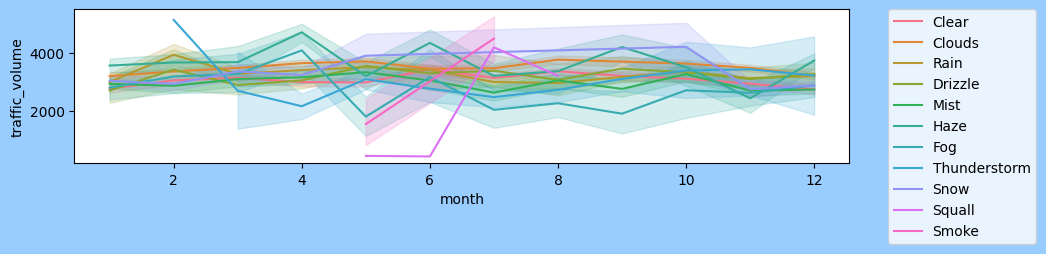

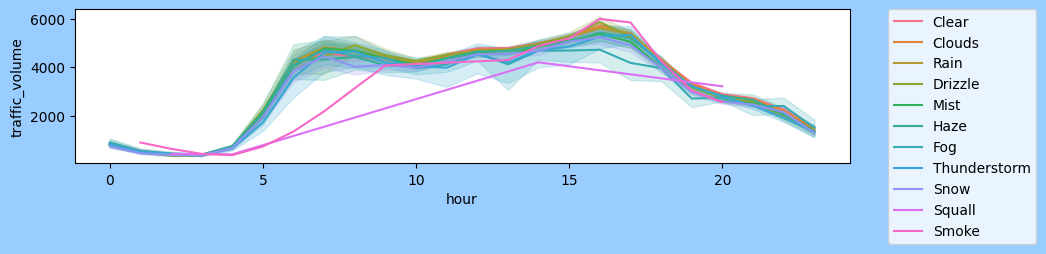

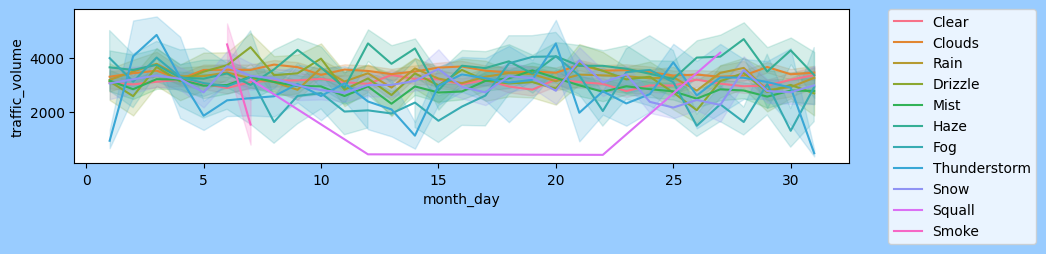

In [ ]:
new_features = [ "year","month", "hour", "month_day"]

for i in new_features:
    plt.figure(figsize=(10, 2),facecolor="#99ccff")
    ax=sns.lineplot(x=data[i],y="traffic_volume",data=data, hue="weather_type" )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# **Data tranformation**

In [ ]:
sns.set()

warnings.filterwarnings('ignore')
df = data.sample(20000).reset_index(drop=True)
label_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature','weekday', 'hour', 'month_day', 'year', 'month','traffic_volume']

plt.show()

In [ ]:
df

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,last_2_hour_traffic,last_3_hour_traffic,last_4_hour_traffic,last_5_hour_traffic,last_6_hour_traffic,hour,month_day,weekday,month,year
0,2016-08-06 05:00:00,0,133,88,4,180,7,7,287.25,0.0,...,642.0,896.0,1178.0,1794.0,2497.0,5,6,6,8,2016
1,2016-09-17 03:00:00,0,139,65,1,35,7,7,288.58,0.0,...,800.0,1193.0,1238.0,1973.0,2650.0,3,17,6,9,2016
2,2012-10-29 02:00:00,0,47,40,3,20,6,6,271.46,0.0,...,530.0,1065.0,1570.0,2213.0,2772.0,2,29,1,10,2012
3,2017-04-12 21:00:00,0,29,68,1,251,2,2,282.09,0.0,...,2898.0,2898.0,2898.0,3452.0,3452.0,21,12,3,4,2017
4,2015-07-11 16:00:00,0,183,99,1,262,7,7,299.38,0.0,...,4826.0,4483.0,4343.0,3994.0,3634.0,16,11,6,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2016-01-04 06:00:00,0,292,87,6,327,4,4,259.91,0.0,...,410.0,270.0,476.0,1415.0,1813.0,6,4,1,1,2016
19996,2014-04-01 03:00:00,0,89,37,5,200,6,6,271.84,0.0,...,341.0,544.0,1000.0,1446.0,2111.0,3,1,2,4,2014
19997,2013-05-06 07:00:00,0,244,93,5,120,3,3,276.65,0.0,...,2634.0,732.0,284.0,303.0,330.0,7,6,1,5,2013
19998,2013-10-26 19:00:00,0,296,80,2,210,8,8,279.16,0.0,...,5127.0,6116.0,5341.0,3824.0,2555.0,19,26,6,10,2013


# **Remove the columns not needed**

In [ ]:
features = numeric_columns+label_columns
df = df[features]
df

,is_holiday,temperature,weekday,hour,month_day,year,month,traffic_volume,weather_type,weather_description
0,0,287.25,6,5,6,2016,8,1123,Clear,Sky is Clear
1,0,288.58,6,3,17,2016,9,391,Clear,sky is clear
2,0,271.46,1,2,29,2012,10,270,Mist,mist
3,0,282.09,3,21,12,2017,4,2390,Mist,mist
4,0,299.38,6,16,11,2015,7,4267,Rain,light rain
...,...,...,...,...,...,...,...,...,...,...
19995,0,259.91,1,6,4,2016,1,5532,Mist,mist
19996,0,271.84,2,3,1,2014,4,381,Clouds,overcast clouds
19997,0,276.65,1,7,6,2013,5,6970,Clouds,overcast clouds
19998,0,279.16,6,19,26,2013,10,3578,Clouds,overcast clouds


# **Numeric the string values**

In [ ]:
from functools import reduce
def unique(list1):
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    print(ans)

n1 = data['weather_type']
n2 = data['weather_description']
unique(n1)
unique(n2)
n1features = ['Rain', 'Clouds', 'Clear', 'Snow', 'Mist',
              'Drizzle', 'Haze', 'Thunderstorm', 'Fog', 'Smoke', 'Squall']
n2features = ['light rain', 'few clouds', 'Sky is Clear', 'light snow', 'sky is clear', 'mist', 'broken clouds', 'moderate rain', 'drizzle', 'overcast clouds', 'scattered clouds', 'haze', 'proximity thunderstorm', 'light intensity drizzle', 'heavy snow', 'heavy intensity rain', 'fog', 'heavy intensity drizzle', 'shower snow', 'snow', 'thunderstorm with rain',
              'thunderstorm with heavy rain', 'thunderstorm with light rain', 'proximity thunderstorm with rain', 'thunderstorm with drizzle', 'smoke', 'thunderstorm', 'proximity shower rain', 'very heavy rain', 'proximity thunderstorm with drizzle', 'light rain and snow', 'light intensity shower rain', 'SQUALLS', 'shower drizzle', 'thunderstorm with light drizzle']
"""#Data Preparation"""

n11 = []
n22 = []
for i in range(20000):
    if(n1[i]) not in n1features:
        n11.append(0)
    else:
        n11.append((n1features.index(n1[i]))+1)
    if n2[i] not in n2features:
        n22.append(0)
    else:
        n22.append((n2features.index(n2[i]))+1)
# print(n11)
# print(n22)
df['weather_type'] = n11
df['weather_description'] = n22


['Clear', 'Clouds', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog', 'Thunderstorm', 'Snow', 'Squall', 'Smoke']
['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds', 'overcast clouds', 'light rain', 'light intensity drizzle', 'mist', 'haze', 'fog', 'proximity shower rain', 'drizzle', 'moderate rain', 'heavy intensity rain', 'proximity thunderstorm', 'thunderstorm with light rain', 'proximity thunderstorm with rain', 'heavy snow', 'heavy intensity drizzle', 'snow', 'thunderstorm with heavy rain', 'freezing rain', 'shower snow', 'light rain and snow', 'light intensity shower rain', 'SQUALLS', 'thunderstorm with rain', 'proximity thunderstorm with drizzle', 'thunderstorm', 'Sky is Clear', 'very heavy rain', 'thunderstorm with light drizzle', 'light snow', 'thunderstorm with drizzle', 'smoke', 'shower drizzle', 'light shower snow', 'sleet']


In [ ]:
df

,is_holiday,temperature,weekday,hour,month_day,year,month,traffic_volume,weather_type,weather_description
0,0,287.25,6,5,6,2016,8,1123,3,5
1,0,288.58,6,3,17,2016,9,391,3,5
2,0,271.46,1,2,29,2012,10,270,2,2
3,0,282.09,3,21,12,2017,4,2390,2,2
4,0,299.38,6,16,11,2015,7,4267,2,2
...,...,...,...,...,...,...,...,...,...,...
19995,0,259.91,1,6,4,2016,1,5532,4,4
19996,0,271.84,2,3,1,2014,4,381,6,14
19997,0,276.65,1,7,6,2013,5,6970,2,10
19998,0,279.16,6,19,26,2013,10,3578,2,10


# **Data Preparation**

In [ ]:
features = ['is_holiday', 'temperature','weekday', 'hour', 'month_day', 'year', 'month','weather_type','weather_description']
X = df.loc[:,features]
y = df.loc[:,"traffic_volume"]

In [ ]:
X

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,0,287.25,6,5,6,2016,8,3,5
1,0,288.58,6,3,17,2016,9,3,5
2,0,271.46,1,2,29,2012,10,2,2
3,0,282.09,3,21,12,2017,4,2,2
4,0,299.38,6,16,11,2015,7,2,2
...,...,...,...,...,...,...,...,...,...
19995,0,259.91,1,6,4,2016,1,4,4
19996,0,271.84,2,3,1,2014,4,6,14
19997,0,276.65,1,7,6,2013,5,2,10
19998,0,279.16,6,19,26,2013,10,2,10


In [ ]:
y

0        1123
1         391
2         270
3        2390
4        4267
         ... 
19995    5532
19996     381
19997    6970
19998    3578
19999    3923
Name: traffic_volume, Length: 20000, dtype: int64

In [ ]:
X.head()

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,0,287.25,6,5,6,2016,8,3,5
1,0,288.58,6,3,17,2016,9,3,5
2,0,271.46,1,2,29,2012,10,2,2
3,0,282.09,3,21,12,2017,4,2,2
4,0,299.38,6,16,11,2015,7,2,2


# **Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)
X_train

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
6377,0,269.84,2,8,7,2017,2,3,5
11114,0,287.01,3,2,5,2016,10,2,10
6138,0,279.50,7,9,1,2015,11,8,22
3618,0,273.75,1,23,23,2017,1,5,6
7862,0,284.37,1,15,19,2014,5,3,3
...,...,...,...,...,...,...,...,...,...
9372,0,275.96,2,8,11,2014,3,3,5
7291,0,273.45,5,19,30,2012,11,3,3
17728,0,266.07,5,13,22,2013,2,5,6
7293,0,257.47,2,23,10,2017,1,2,11


In [ ]:
y_train

6377     5059
11114     243
6138     2890
3618      977
7862     5461
         ... 
9372     5297
7291     3618
17728    4476
7293      919
17673     850
Name: traffic_volume, Length: 15000, dtype: int64

In [ ]:
X_test


,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
19778,0,295.69,5,9,4,2015,9,5,6
4376,0,278.89,3,10,22,2017,2,4,20
10188,0,286.90,4,21,8,2014,5,4,4
9887,0,277.91,6,21,25,2017,3,2,7
4441,0,273.75,5,5,26,2013,4,3,5
...,...,...,...,...,...,...,...,...,...
8552,0,291.42,6,15,17,2014,5,2,11
3788,0,275.69,6,6,11,2017,2,2,10
19172,0,273.16,3,0,24,2013,4,6,9
17019,0,288.13,5,0,2,2016,9,3,5


# **Linear Regression Model**

In [ ]:
#instantiating an instance of the Linear Regression
linear_model = LinearRegression()

#train the model
linear_model.fit(X_train, y_train)

#make predictiion
regresor_prediction = linear_model.predict(X_test)



# **Random Forest**



In [ ]:
#instantiating an instance of the Random Forest Model
random_model = RandomForestRegressor()

#train the model
random_model.fit(X_train,y_train)

#make predictiion
randomforest_prediction = random_model.predict(X_test)

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# **Decision Tree Regression model**

In [ ]:
#instantiating an instance of the Decision Tree Regression model
decision_model = DecisionTreeRegressor(max_depth = 5)

#train the model
decision_model.fit(X_train,y_train)

#make predictiion
decision_prediction = decision_model.predict(X_test)

# **knn regression model**

In [ ]:
#instantiating an instance of the knn regression model
knn_model = KNeighborsClassifier(n_neighbors=8)

#train the model
knn_model.fit(X_train,y_train)

#make predictiion
knn_prediction = knn_model.predict(X_test)

# **SVM Model**

In [ ]:
#instantiating an instance of the SVM regression model
svm_regressor = SVR(kernel = 'rbf')

#train the model
svm_regressor.fit(X_train,y_train)

#make predictiion
svm_predict = svm_regressor.predict(X_test)

# **R^2 Score**

In [ ]:
from sklearn.metrics import r2_score

linear_R2 = r2_score(y_test,regresor_prediction)
random_R2 = r2_score(y_test,randomforest_prediction)
decision_R2 = r2_score(y_test,decision_prediction)
knn_R2 = r2_score(y_test,knn_prediction)
svm_R2 = r2_score(y_test,svm_predict)

print('linear',linear_R2)
print('random',random_R2)
print('decision',decision_R2)
print('knn',knn_R2)
print('SVM',svm_R2)


linear 0.15215363440749097
random 0.9573000399700354
decision 0.9072058988228708
knn 0.19795821449188145
SVM -0.0019018528553231828


# **Choose best Model**

In [ ]:
import numpy as np
models = ('linear','random','Decision','KNN','SVM')
n = [linear_R2,random_R2,decision_R2,knn_R2,svm_R2]
y_pos = np.arange(len(models))
highlights = ['blue' if (x<max(n)) else 'red' for x in n]

<BarContainer object of 5 artists>

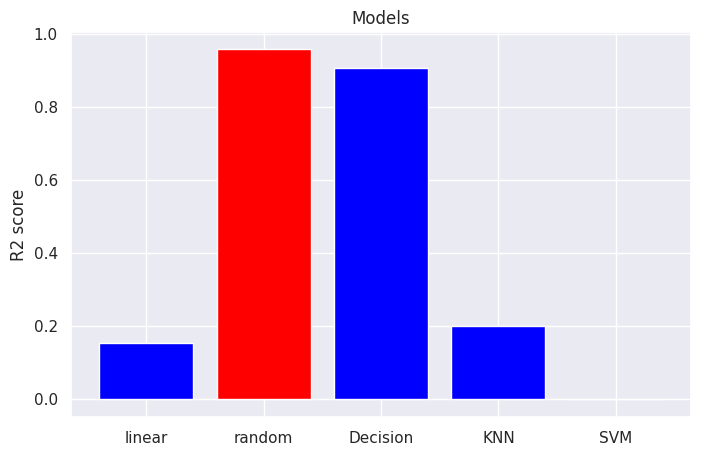

In [ ]:
plt.figure(figsize=(8,5))
plt.xticks(y_pos,models)
plt.ylabel('R2 score')
plt.title('Models')
plt.bar(y_pos,n,color=highlights)

#Visualization

#Train the Model

#User input

In [ ]:
ip=[0,89,2,288.28,1,9,2,2012,10]
ip = x_scaler.transform([ip])
out=regr.predict(ip)
print('Before inverse Scaling :',out)

NameError: ignored

In [ ]:
y_pred = y_scaler.inverse_transform([out])
print('Traffic Volume : ',y_pred)

In [ ]:
if(y_pred<=1000):
  print("No Traffic ")
elif y_pred>1000 and y_pred<=3000:
  print("Busy or Normal Traffic")
elif y_pred>3000 and y_pred<=5500:
  print("heavy Traffic")
else:
  print("Worst case")

#Evaluating Metrics